In [1]:
import sys
import os
sys.path.append(os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir))))

In [2]:
# imports

import pandas as pd
import numpy as np
from src.data_ingester.data_ingester_factory import DataIngesterFactory
from src.analysis.basic_data_inspection import DataTypesInspectionStrategy, DataSummaryInspectionStrategy
from src.analysis.inspection_decorator import Inspector
from src.analysis.missing_value_analysis import BasicMissingValueAnalyser

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',100)

In [3]:
#extract data
df = DataIngesterFactory.get_data_ingester('.zip').ingest('../data/archive.zip')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
inspecor = Inspector(df)
inspecor.add_strategy(DataTypesInspectionStrategy()).add_strategy(DataSummaryInspectionStrategy()).execute()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
Neumerical Information
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.00

Basic Missing Values Identified
Series([], dtype: int64)


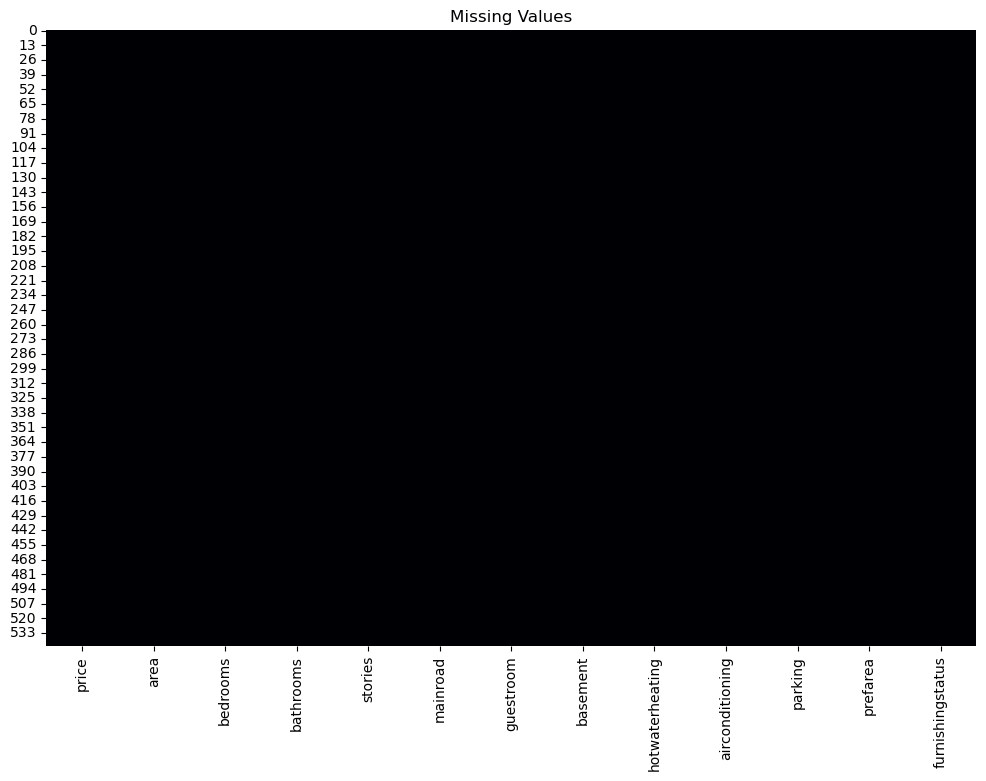

In [5]:
analyzer = BasicMissingValueAnalyser()
analyzer.analyse(df)

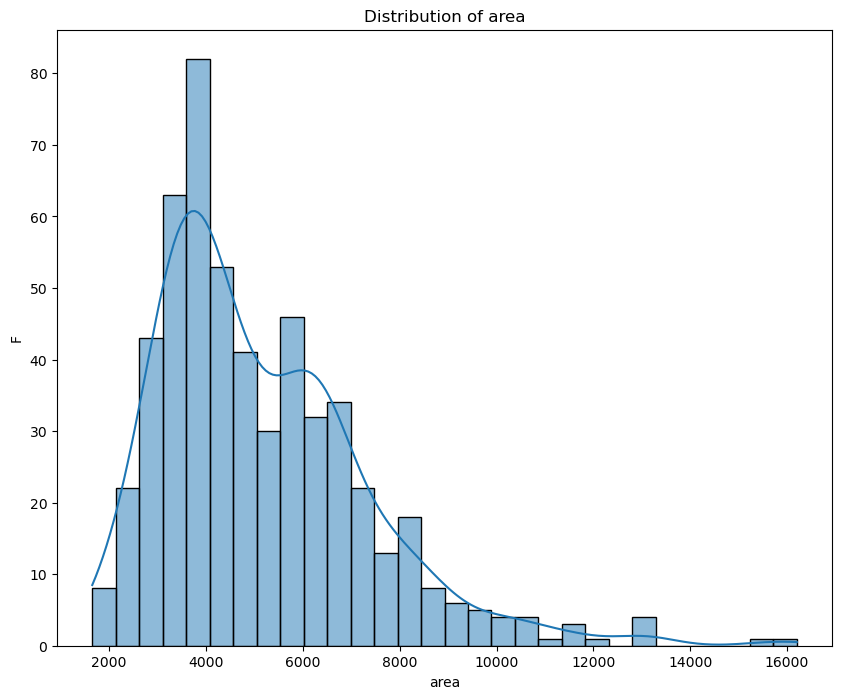

In [6]:
from src.analysis.varient_analysis import NumericalUnivarientAnalyzer

nva = NumericalUnivarientAnalyzer('area')
nva.analyse(df)

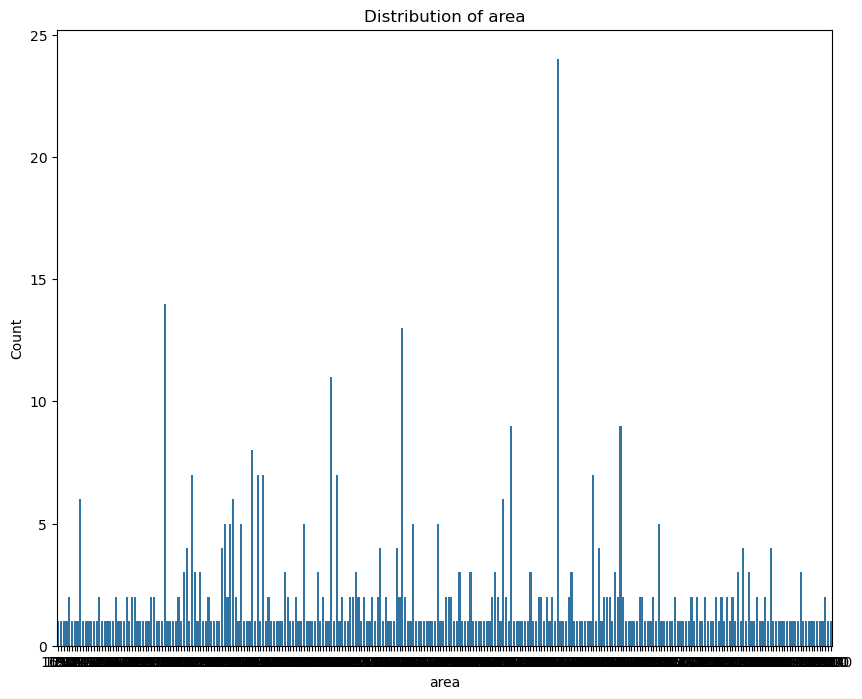

In [7]:
from src.analysis.varient_analysis import CategoricalUnivarientAnalyzer

nva = CategoricalUnivarientAnalyzer('area')
nva.analyse(df)

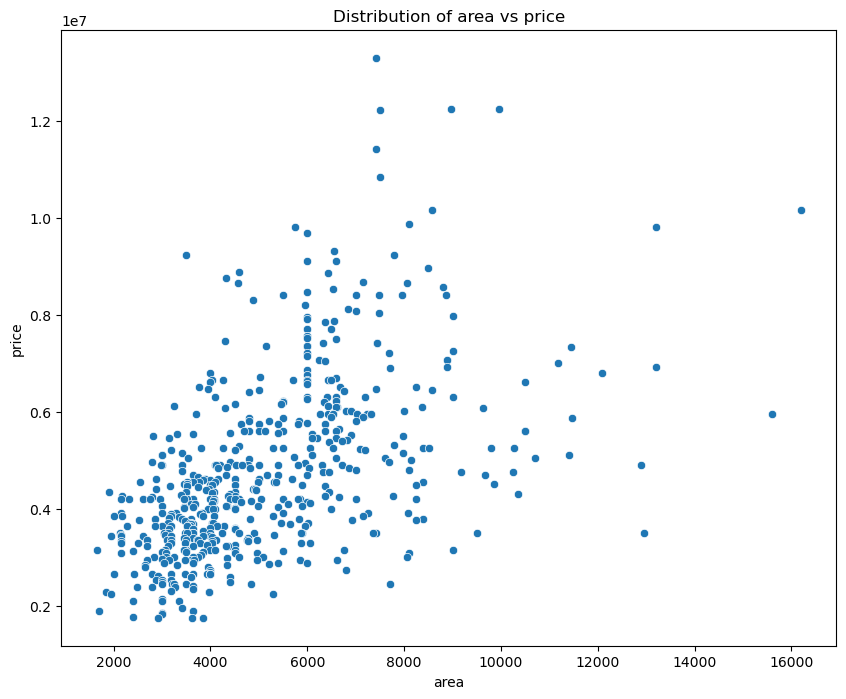

In [8]:
from src.analysis.varient_analysis import NumericalBiVarientAnalysis

nbva = NumericalBiVarientAnalysis('area', 'price')
nbva.analyse(df)

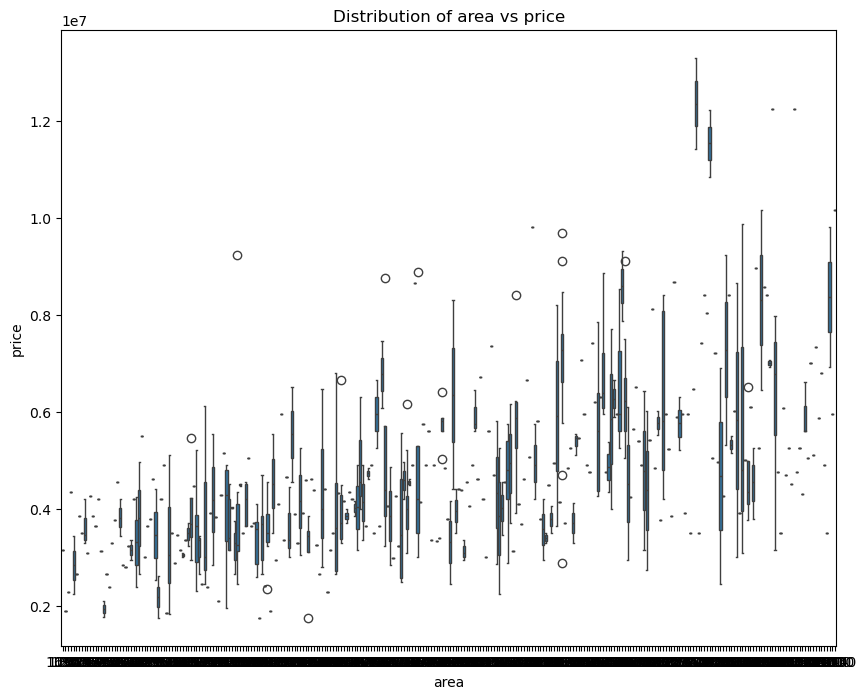

In [9]:
from src.analysis.varient_analysis import CategoricalBiVarientAnalysis

nbva = CategoricalBiVarientAnalysis('area', 'price')
nbva.analyse(df)

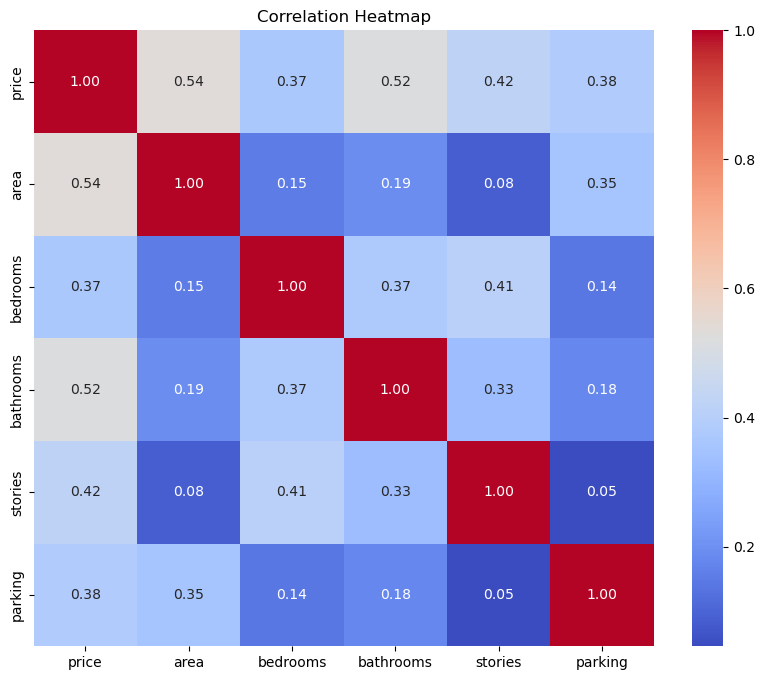

<Figure size 1000x800 with 0 Axes>

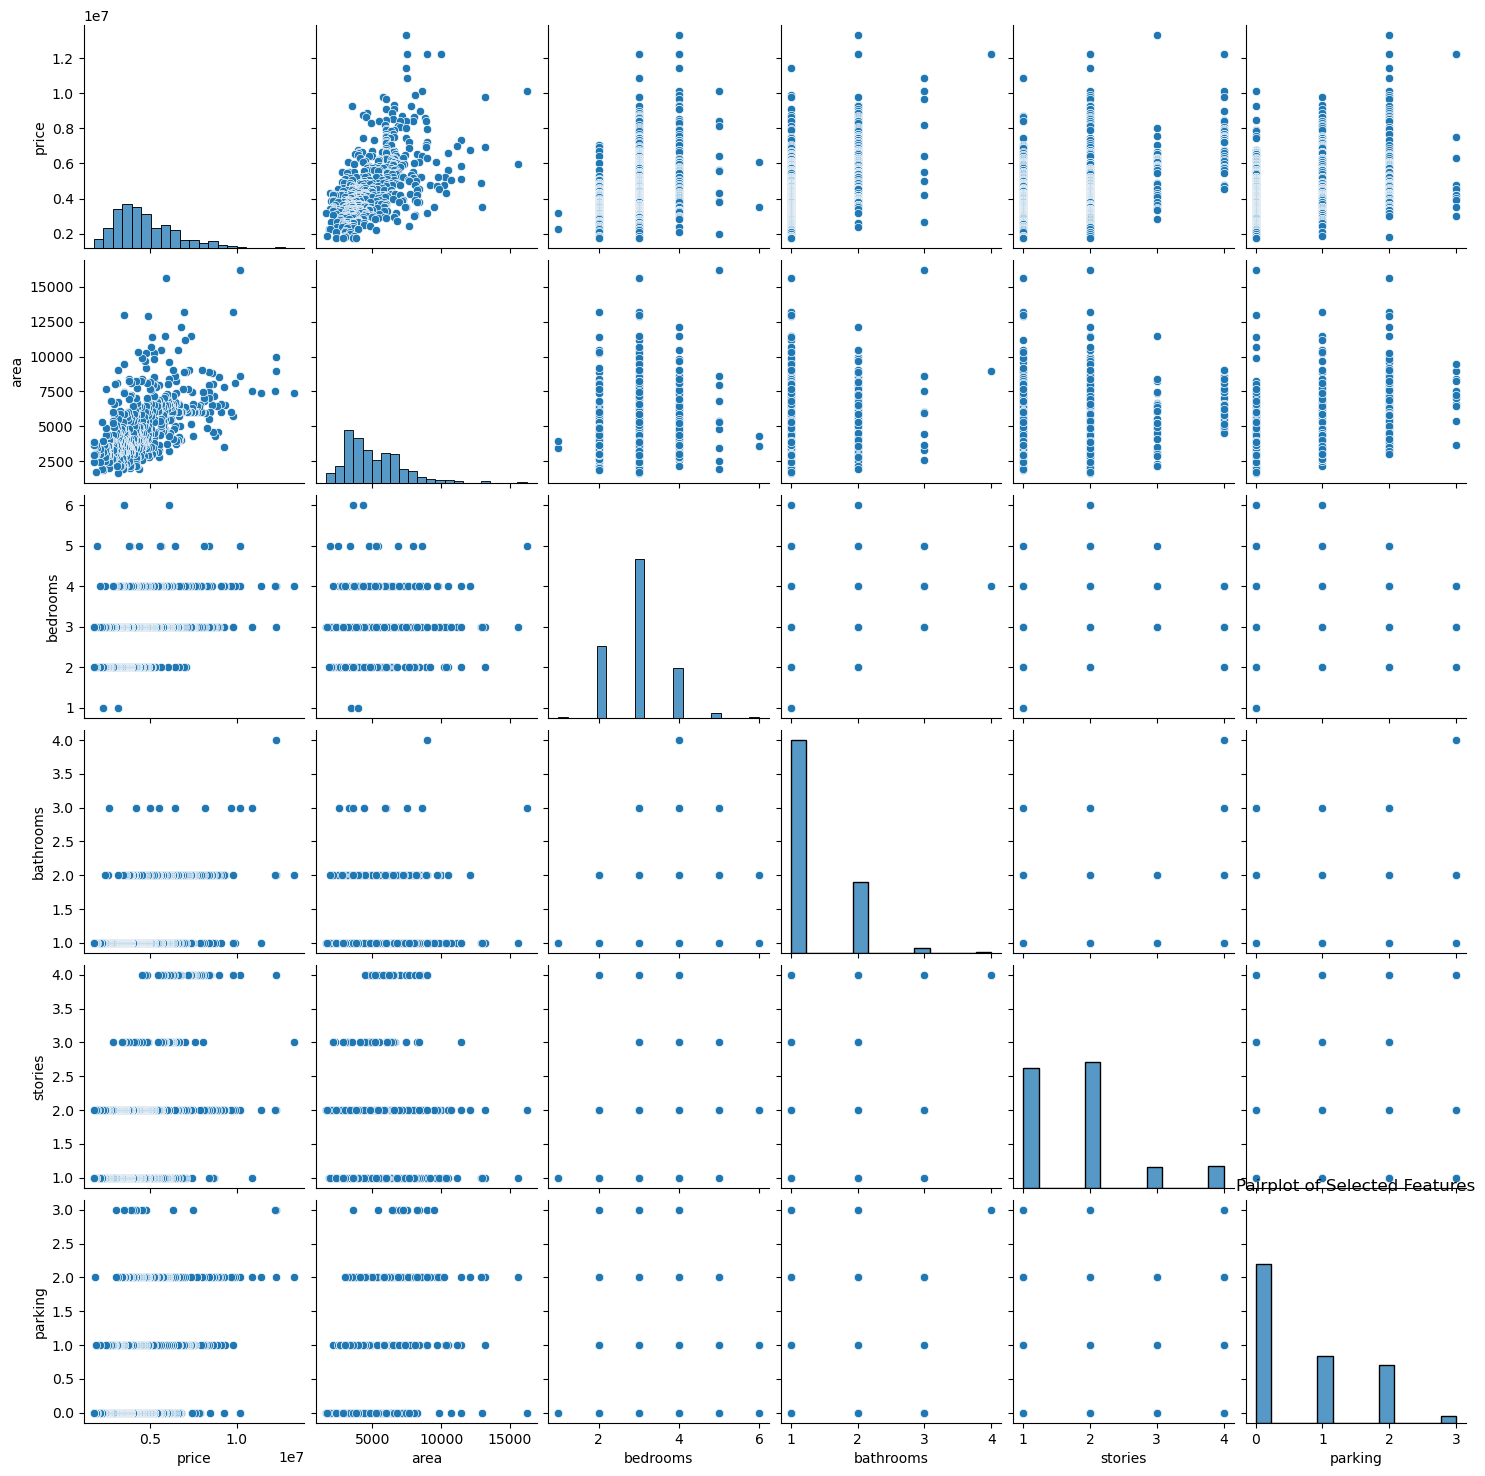

In [10]:
from src.analysis.varient_analysis import BasicMultiVarientAnalysis

nbva = BasicMultiVarientAnalysis()
nbva.analyse(df)

In [11]:
from src.core.missing_value_handling import DropMissingValues

df = DataIngesterFactory.get_data_ingester('.zip').ingest('../data/archive.zip')
df = DropMissingValues().handle(df)
df

2025-04-10 22:25:29,969 INFO:root:Initiated:Missing value:720: drop on axis 0 with threshold None
2025-04-10 22:25:29,971 INFO:root:Completed:Missing value:720


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [12]:
from src.core.feature_engineering import FeatureEngineeringFactory

fe = FeatureEngineeringFactory.create_strategy('log', ['area'])
df = fe.transform(df)

2025-04-10 22:25:30,049 INFO:root:Applying log transformation to features: ['area']
2025-04-10 22:25:30,050 INFO:root:Log transformation applied to features: ['area']


In [13]:
from src.core.outlier_handling import OutlierHandler

df = OutlierHandler("zscore", 1.0).handle_outliers("remove", df)
df.head()

2025-04-10 22:25:30,060 INFO:root:Handling outliers in the data.
2025-04-10 22:25:30,061 INFO:root:Detecting outliers using Z-Score method.
2025-04-10 22:25:30,065 INFO:root:Outliers detected using Z-Score method.
2025-04-10 22:25:30,068 INFO:root:Outliers handled in the data.


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
2,12250000,9.206433,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,8.922792,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,8.912069,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,8.922792,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
7,10150000,9.692828,5,3,2,yes,no,no,no,no,0,no,unfurnished


In [34]:
from src.core.data_splitting import DataSplitter

X_train,X_test, y_train,y_test = DataSplitter("basic", 0.2,random_state=42).split_data(df.select_dtypes(include=np.number), "price")

2025-04-10 22:36:26,858 INFO:root:Splitting data into training and testing sets.
2025-04-10 22:36:26,861 INFO:root:Data splitting completed.


In [35]:
print(X_train.head())
print(y_train.head())
print(X_test.head())
print(y_test.head())

         area  bedrooms  bathrooms  stories  parking
248  8.318986         2          2        1        0
544  8.256088         3          1        2        0
421  8.466110         2          1        1        0
513  8.389587         3          1        2        0
357  8.843759         4          1        2        1
248    4543000
544    1750000
421    3360000
513    2485000
357    3773000
Name: price, dtype: int64
         area  bedrooms  bathrooms  stories  parking
233  8.333511         3          1        1        0
77   8.779711         3          2        3        0
356  7.832411         5          2        1        1
90   8.517393         3          1        2        0
474  8.378621         4          1        2        1
233    4620000
77     6650000
356    3773000
90     6440000
474    2975000
Name: price, dtype: int64


In [36]:
from src.core.model_building import ModelBuildFactory

b = ModelBuildFactory.create_model_strategy('linear_regression')
b.set_training_data(X_train, y_train)
b.build_model()

2025-04-10 22:36:30,850 INFO:root:Training data set successfully.
2025-04-10 22:36:30,851 INFO:root:Building Linear Regression model.
2025-04-10 22:36:30,851 INFO:root:Creating preprocessing pipeline.
2025-04-10 22:36:30,853 INFO:root:Categorical columns: Index([], dtype='object')
2025-04-10 22:36:30,854 INFO:root:Numerical columns: Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')
2025-04-10 22:36:30,854 INFO:root:Linear Regression model built successfully.


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('model', LinearRegression())])

In [38]:
b.fit()

2025-04-10 22:36:39,040 INFO:root:Model training started.
2025-04-10 22:36:39,063 INFO:root:Model training completed.


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('model', LinearRegression())])